# Chapter 5: Evaluating Predictive Performance

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.


## Import required packages

In [1]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt


!pip install scikit-plot
import scikitplot as skplt
!pip install dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart, adjusted_r2_score, exhaustive_search, backward_elimination, forward_selection, AIC_score, BIC_score


Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Looking in indexes: http://mirrors.aliyun.com/pypi/simple


## Load file and generate training and validation sets. 


* load the Toyota Corolla file
* remove variables Model, ID, Price, Fuel Type and COlor from the model
* create training and validation data sets
* fit a regression model predicting the price

In [2]:
#run for class
car_df = pd.read_csv("ToyotaCorolla.csv")

In [3]:
car_df.shape

(1436, 39)

In [4]:
car_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [5]:
#run for class
excluded_columns = ('Price','Id','Model','Color','Fuel_Type')
outcome = 'Price'
predictors = [s for s in car_df.columns if s not in excluded_columns]

In [6]:
outcome

'Price'

In [7]:
predictors

['Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'HP',
 'Met_Color',
 'Automatic',
 'CC',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Parking_Assistant',
 'Tow_Bar']

In [8]:
#run for class
X = car_df[predictors]
y = car_df[outcome]

In [9]:
X

,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,23,10,2002,46986,90,1,0,2000,3,4,...,1,1,0,0,0,1,0,0,0,0
1,23,10,2002,72937,90,1,0,2000,3,4,...,0,1,0,0,0,1,0,0,0,0
2,24,9,2002,41711,90,1,0,2000,3,4,...,0,1,0,0,0,1,0,0,0,0
3,26,7,2002,48000,90,0,0,2000,3,4,...,0,1,0,0,0,1,0,0,0,0
4,30,3,2002,38500,90,0,0,2000,3,4,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,69,12,1998,20544,86,1,0,1300,3,4,...,1,1,0,1,1,1,0,0,0,0
1432,72,9,1998,19000,86,0,0,1300,3,4,...,0,1,0,0,1,1,0,0,0,0
1433,71,10,1998,17016,86,0,0,1300,3,4,...,0,1,0,0,0,1,0,0,0,0
1434,70,11,1998,16916,86,1,0,1300,3,4,...,0,0,0,0,0,1,0,0,0,0


In [10]:
#run for class
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=.3, random_state=10)

In [11]:
print(train_X.shape)
valid_X.shape

(1005, 34)


(431, 34)

In [12]:
#run for class
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

LinearRegression()

In [13]:
car_lm.intercept_

-30254.01956421857

In [14]:
car_lm.coef_

array([-1.10979894e+02, -8.41621988e+01,  1.62618411e+01, -1.70830433e-02,
        2.93225512e+01,  2.24159939e+01,  2.30232698e+02, -1.66337901e+00,
        1.82400532e+01,  6.11066753e-12,  1.21631398e+02,  9.18970585e+00,
        1.26642857e+01,  2.02455321e+02,  4.09307460e+02,  6.59923141e+01,
       -2.75454620e+02, -1.65095068e+02, -1.22285241e+01,  2.65703052e+02,
        2.43023837e+03, -1.38961903e+02,  1.16814704e+02, -4.25989530e+01,
        2.95492759e+02,  1.39900512e+02,  1.32685667e+03,  5.73599571e+01,
        3.41958341e+02, -1.53088967e+02,  1.73152756e+02, -1.42602743e+03,
       -6.11310503e+02, -1.96608698e+02])

In [15]:
regressionSummary(train_y, car_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1102.8795
            Mean Absolute Error (MAE) : 796.7292
          Mean Percentage Error (MPE) : -0.9735
Mean Absolute Percentage Error (MAPE) : 8.0383


In [16]:
pred_y = car_lm.predict(train_X)

In [17]:
pred_y

array([ 8604.82484614, 15142.81070407, 10076.96408308, ...,
       10254.9051788 ,  7071.5799458 ,  8050.13888913])

In [18]:
adjusted_r2_score(train_y, pred_y, car_lm)

0.9005289955051397

In [19]:
result_train = pd.DataFrame({'predicted': pred_y,
                       'actual': train_y,
                       'residuals': train_y - pred_y})

In [20]:
result_train

,predicted,actual,residuals
774,8604.824846,9750,1145.175154
41,15142.810704,16750,1607.189296
827,10076.964083,9650,-426.964083
1122,9135.878824,7460,-1675.878824
823,9243.011425,10500,1256.988575
...,...,...,...
1393,7945.423088,7250,-695.423088
1344,8671.513686,8950,278.486314
527,10254.905179,9950,-304.905179
1149,7071.579946,8050,978.420054


In [21]:
#run for class
car_lm_predict = car_lm.predict(valid_X)
car_lm_predict.shape

(431,)

In [22]:
#run for class
result = pd.DataFrame({'predicted': car_lm_predict,
                       'actual': valid_y,
                       'residual': valid_y - car_lm_predict})

In [23]:
result.head(10)

,predicted,actual,residual
995,9214.580438,9950,735.419562
514,10189.697273,10500,310.302727
612,8407.743949,7750,-657.743949
307,12578.470081,13500,921.529919
981,9725.774386,9750,24.225614
323,11665.875737,11250,-415.875737
494,10927.533822,11950,1022.466178
1275,7750.939489,7250,-500.939489
35,15165.457096,15750,584.542904
1002,9785.166410,8250,-1535.166410


In [24]:
#build data accuracy
regressionSummary(train_y, pred_y)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1102.8795
            Mean Absolute Error (MAE) : 796.7292
          Mean Percentage Error (MPE) : -0.9735
Mean Absolute Percentage Error (MAPE) : 8.0383


In [25]:
#validation data accuracy
regressionSummary(valid_y, car_lm_predict)


Regression statistics

                      Mean Error (ME) : 190.2114
       Root Mean Squared Error (RMSE) : 1610.1286
            Mean Absolute Error (MAE) : 899.4556
          Mean Percentage Error (MPE) : 0.4232
Mean Absolute Percentage Error (MAPE) : 8.4274


In [26]:
#build data r2
adjusted_r2_score(train_y, pred_y, car_lm)

0.9005289955051397

In [27]:
#validation data r2
adjusted_r2_score(valid_y, car_lm_predict, car_lm)

0.802852150417888

In [28]:
car_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [29]:
predictors_2 = ['KM','Automatic','CC','Doors','Boardcomputer','Color']

In [30]:
X2 = pd.get_dummies(car_df[predictors_2], drop_first=True)

In [31]:
X2.head()

,KM,Automatic,CC,Doors,Boardcomputer,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,46986,0,2000,3,1,0,1,0,0,0,0,0,0,0
1,72937,0,2000,3,1,0,0,0,0,0,1,0,0,0
2,41711,0,2000,3,1,0,1,0,0,0,0,0,0,0
3,48000,0,2000,3,1,1,0,0,0,0,0,0,0,0
4,38500,0,2000,3,1,1,0,0,0,0,0,0,0,0


In [32]:
y2=car_df[outcome]

In [33]:
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=.25, random_state=123)

In [34]:
car_lm2 = LinearRegression()
car_lm2.fit(train_X2, train_y2)

LinearRegression()

In [35]:
#reduced model validation summary
regressionSummary(valid_y2,car_lm2.predict(valid_X2))


Regression statistics

                      Mean Error (ME) : -25.4134
       Root Mean Squared Error (RMSE) : 2388.0970
            Mean Absolute Error (MAE) : 1695.6880
          Mean Percentage Error (MPE) : -3.9314
Mean Absolute Percentage Error (MAPE) : 15.4367


In [36]:
#full model validation summary
regressionSummary(valid_y,car_lm.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 190.2114
       Root Mean Squared Error (RMSE) : 1610.1286
            Mean Absolute Error (MAE) : 899.4556
          Mean Percentage Error (MPE) : 0.4232
Mean Absolute Percentage Error (MAPE) : 8.4274


In [37]:
#reduced model r2
adjusted_r2_score(valid_y2, car_lm2.predict(valid_X2), car_lm2)

0.5792455559560996

In [38]:
#full model r2
adjusted_r2_score(valid_y, car_lm.predict(valid_X), car_lm)

0.802852150417888

## Create a distribution of the residuals

* calculate the residual values for the training set
* calculate the residual values for the validation set
* create a historgram of the residual values for normality check
* create a boxplot of the residuals for possible outlier check

In [39]:
pred_error_train = pd.DataFrame({'residual': train_y-car_lm.predict(train_X),
                                 'data_set': 'training'})
pred_error_valid = pd.DataFrame({'residual': valid_y-car_lm.predict(valid_X),
                                 'data_set': 'validation'})

In [40]:
pred_error_train.head(10)

,residual,data_set
774,1145.175154,training
41,1607.189296,training
827,-426.964083,training
1122,-1675.878824,training
823,1256.988575,training
345,980.654437,training
1030,-175.551317,training
525,-730.995612,training
678,451.554629,training
280,15.001135,training


In [41]:
pred_error_both = pred_error_train.append(pred_error_valid, ignore_index=True)

In [42]:
pred_error_both

,residual,data_set
0,1145.175154,training
1,1607.189296,training
2,-426.964083,training
3,-1675.878824,training
4,1256.988575,training
...,...,...
1431,892.052151,validation
1432,59.703906,validation
1433,1055.126269,validation
1434,-152.826375,validation


array([<AxesSubplot:title={'center':'residual'}>], dtype=object)

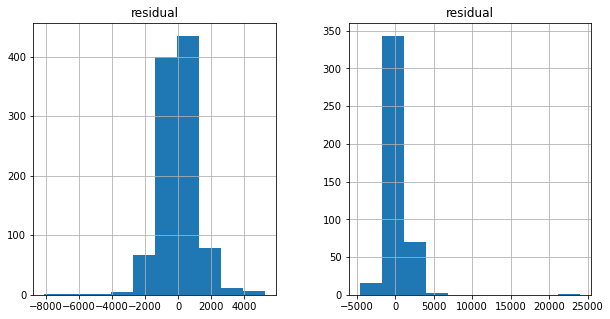

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
pred_error_train.hist(ax=ax[0])
pred_error_valid.hist(ax=ax[1])

<AxesSubplot:title={'center':'residual'}, xlabel='[data_set]'>

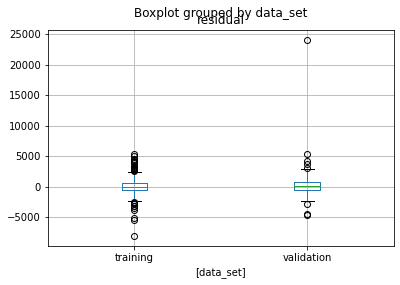

In [44]:
pred_error_both.boxplot(by='data_set')

## Begin Part 2
## Variable Reduction



*   Preform an exhaustive search for the best model.
*   Preform a backward elimination
*   Preform a forward selection
*Examine best model and coefficients





In [45]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

KeyboardInterrupt: 

In [ ]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

In [ ]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

In [ ]:
insights = pd.DataFrame({'variable': best_variables,
                       'coefficient': best_model.coef_})
insights